## **Pessoas LGBTQ+ e/ou negras que trabalham com tecnologias**

>   **OBJETIVO**: Pesquisa desenvolvida com a finalidade de analisar dados demográficos e sociais para se tornar possível fazer previsões em prol das pessoas da comunidade LGBTQIAP+ e/ou que são negras. <br><br>
>   **DISCLAIMER**: Essa pesquisa foi e está sendo realizada de forma voluntária por Naomi Cristina do Lago e não visa ter fins lucrativos. Quaisquer contribuições voluntárias são bem-vindas e as propriedades intelectuais devem ser preservadas e citadas em veículos midiáticos caso sejam usadas e os dados coletados pertencem ao ano de 2023 - portanto podem não refletir 100% de veracidade em anos posteriores à esse.

por Naomi Lago, 2023

## Importing libraries and data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

FILE = './data/form_responses.csv'

df = pd.read_csv(FILE)

print('Columns: \n')
[print(i, column) for i, column in enumerate(df.columns)]

df.columns = [
  'timestamp',
  'email',
  'question_1',
  'question_2',
  'question_3',
  'question_4',
  'question_5',
  'question_6',
  'question_7',
  'question_8',
  'question_9',
  'question_10',
  'question_11',
]

Columns: 

0 Timestamp
1 Email Address
2 1. Com qual gênero você se identifica
3 2. Qual sua orientação sexual?
4 3. Qual o seu nome e sobrenome? (Ex.: Naomi Lago)
5 4. Atualmente, em quais das 5 regiões brasileiras você mora?
6 5. De acordo com a classificação racial do IBGE, com qual raça você se autodeclara?
7 6. Qual a sua faixa etária?
8 7. Atualmente você se encontra em um emprego formal?
9 8. Se você respondeu "Sim" na questão anterior, qual o seu regime de trabalho?
10 9. Você trabalha com Tecnologia da Informação (TI)?
11 10. Qual a sua atual ou almejada área de atuação?
12 Onde você


## EDA - Exploratory Data Analysis

### Converting timestamps

In [2]:
print('Dataframe shape:', df.shape, '\n')

timestamps = []
[timestamps.append(each.replace(" ", "T")) for each in df.timestamp]
 
df["timestamp"] = [pd.to_datetime(string) for string in timestamps]

if df.columns[-1] == 'question_11':
  del df[df.columns[-1]]

print(df.info())

Dataframe shape: (32, 13) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    32 non-null     datetime64[ns]
 1   email        32 non-null     object        
 2   question_1   32 non-null     object        
 3   question_2   32 non-null     object        
 4   question_3   32 non-null     object        
 5   question_4   32 non-null     object        
 6   question_5   32 non-null     object        
 7   question_6   32 non-null     object        
 8   question_7   32 non-null     object        
 9   question_8   32 non-null     object        
 10  question_9   32 non-null     object        
 11  question_10  32 non-null     object        
dtypes: datetime64[ns](1), object(11)
memory usage: 3.1+ KB
None


### Entries counts in January

In [26]:
data = dict({
  'time': df.timestamp.dt.time,
  'day': df.timestamp.dt.day,
  'month': df.timestamp.dt.month_name(),
  'year': df.timestamp.dt.year,
})

chronology = pd.DataFrame(data)

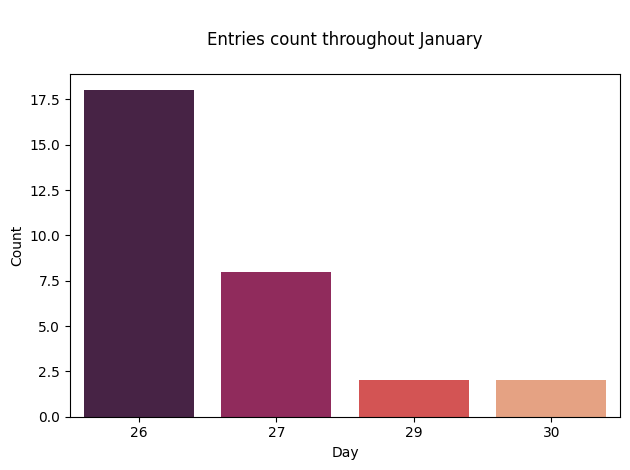

In [97]:
jan_count = chronology[chronology['month'] == 'January'].day.value_counts().to_frame().reset_index()
jan_count.columns = ['day', 'count']

palette = sns.color_palette("rocket", as_cmap=False, n_colors=4)

ax = sns.barplot(
  jan_count,
  x='day',
  y='count',
  palette=palette
)

ax.set_title('\nEntries count throughout January\n')
ax.set_ylabel('Count')
ax.set_xlabel('Day')
plt.tight_layout()
plt.show()

### Entries genders

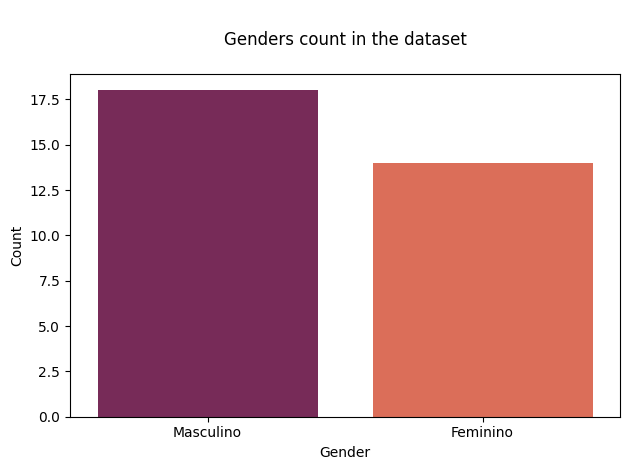

In [145]:
genders = df.question_1.value_counts().to_frame().reset_index()
genders.columns = ['gender', 'count']

palette = sns.color_palette("rocket", as_cmap=False, n_colors=2)

ax = sns.barplot(
  genders,
  x='gender',
  y='count',
  palette=palette
)

ax.set_title('\nGenders count in the dataset\n')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

### Entries sexualities

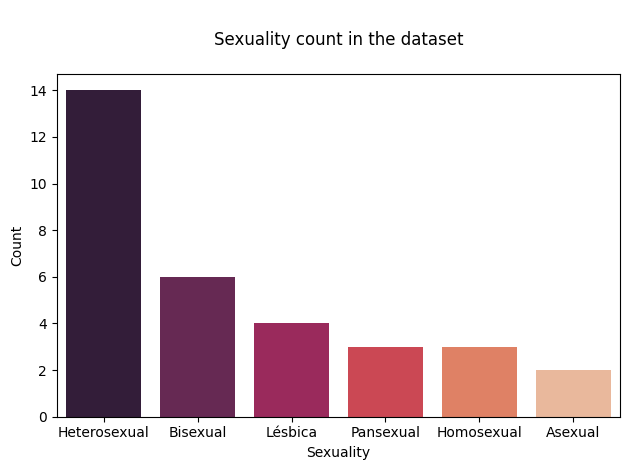

In [144]:
sexuality = df.question_2.value_counts().to_frame().reset_index()
sexuality.columns = ['sexuality', 'count']

palette = sns.color_palette("rocket", as_cmap=False, n_colors=6)

ax = sns.barplot(
  sexuality,
  x='sexuality',
  y='count',
  palette=palette
)

ax.set_title('\nSexuality count in the dataset\n')
ax.set_xlabel('Sexuality')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

### Entries regions

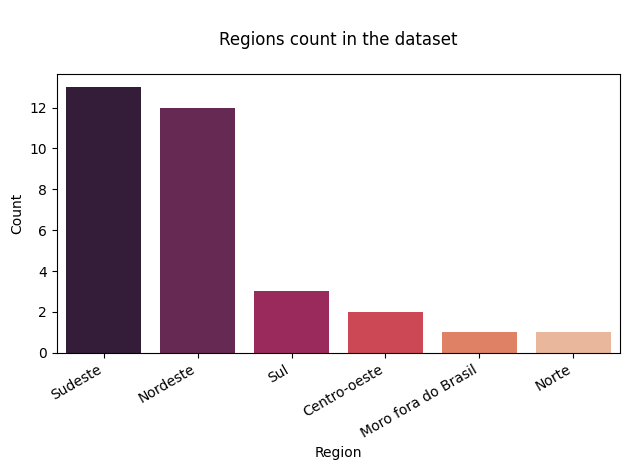

In [161]:
region = df.question_4.value_counts().to_frame().reset_index()
region.columns = ['region', 'count']

palette = sns.color_palette("rocket", as_cmap=False, n_colors=6)

ax = sns.barplot(
  region,
  x='region',
  y='count',
  palette=palette
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_title('\nRegions count in the dataset\n')
ax.set_xlabel('Region')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

### Entries races

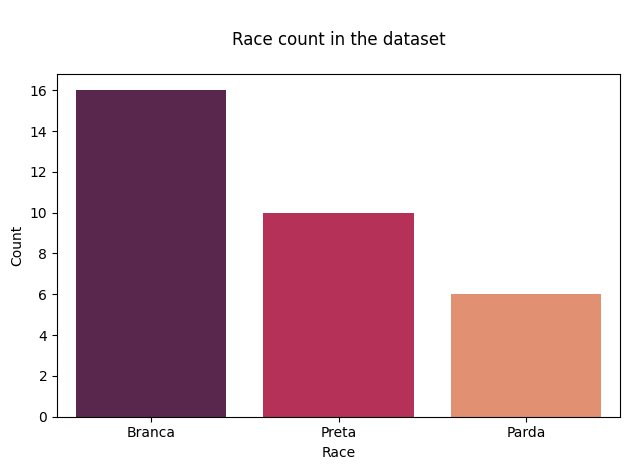

In [160]:
race = df.question_5.value_counts().to_frame().reset_index()
race.columns = ['race', 'count']

palette = sns.color_palette("rocket", as_cmap=False, n_colors=3)

ax = sns.barplot(
  race,
  x='race',
  y='count',
  palette=palette
)

ax.set_title('\nRace count in the dataset\n')
ax.set_ylabel('Count')
ax.set_xlabel('Race')
plt.tight_layout()
plt.show()

### Entries ages

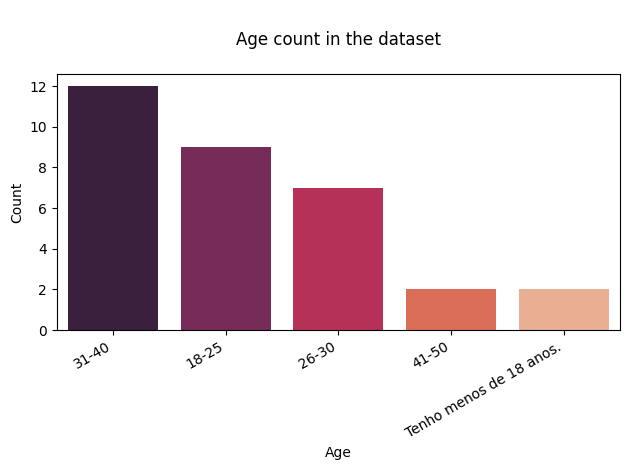

In [158]:
age = df.question_6.value_counts().to_frame().reset_index()
age.columns = ['age', 'count']

palette = sns.color_palette("rocket", as_cmap=False, n_colors=5)

ax = sns.barplot(
  age,
  x='age',
  y='count',
  palette=palette
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_title('\nAge count in the dataset\n')
ax.set_ylabel('Count')
ax.set_xlabel('Age')
plt.tight_layout()
plt.show()

### Entries formal job

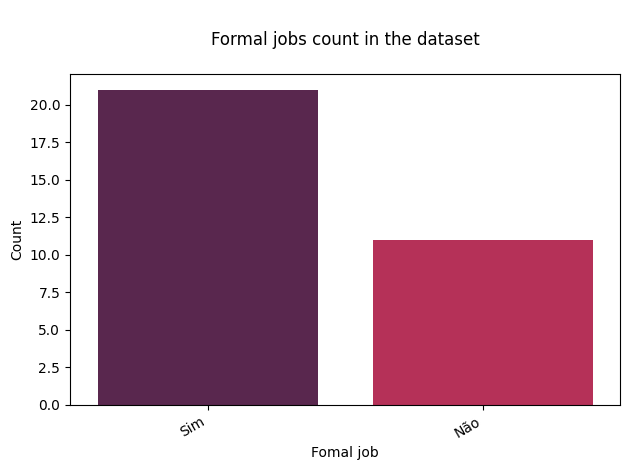

In [163]:
formal_job = df.question_7.value_counts().to_frame().reset_index()
formal_job.columns = ['formal_job', 'count']

palette = sns.color_palette("rocket", as_cmap=False, n_colors=3)

ax = sns.barplot(
  formal_job,
  x='formal_job',
  y='count',
  palette=palette
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_title('\nFormal jobs count in the dataset\n')
ax.set_xlabel('Fomal job')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

### Entries job type

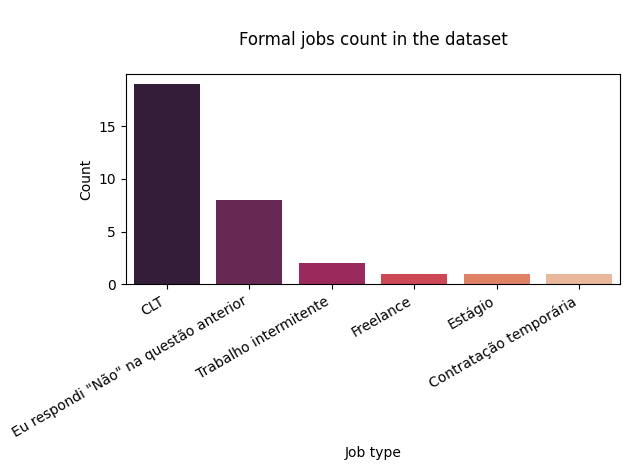

In [170]:
job_type = df.question_8.value_counts().to_frame().reset_index()
job_type.columns = ['job_type', 'count']

palette = sns.color_palette("rocket", as_cmap=False, n_colors=6)

ax = sns.barplot(
  job_type,
  x='job_type',
  y='count',
  palette=palette
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_title('\nFormal jobs count in the dataset\n')
ax.set_xlabel('Job type')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

### Entries IT people

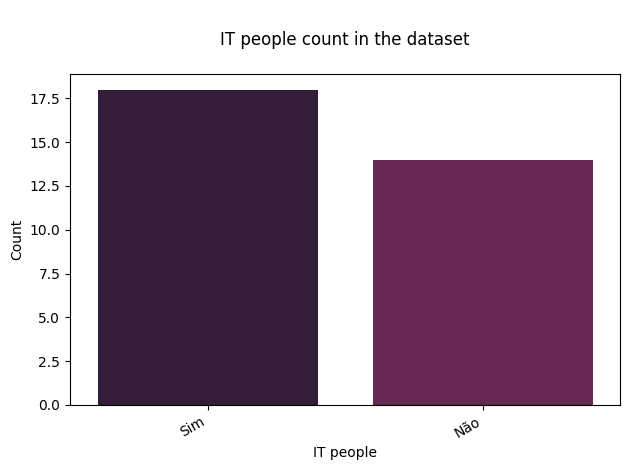

In [172]:
it = df.question_9.value_counts().to_frame().reset_index()
it.columns = ['it', 'count']

palette = sns.color_palette("rocket", as_cmap=False, n_colors=6)

ax = sns.barplot(
  it,
  x='it',
  y='count',
  palette=palette
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_title('\nIT people count in the dataset\n')
ax.set_xlabel('IT people')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()